This file contains python code to

test integration with Gaussian quature vs naive mean



In [1]:
import sys
sys.path.append("../../mypkg")

In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns

from easydict import EasyDict as edict
from tqdm import trange, tqdm
from pprint import pprint
import itertools
from scipy.stats import chi2


In [3]:
# This will reload all imports as soon as the code changes
%load_ext autoreload
%autoreload 2

In [4]:
from constants import DATA_ROOT, RES_ROOT, FIG_ROOT, MIDRES_ROOT
from utils.misc import save_pkl, load_pkl
from hdf_utils.utils import integration_fn, gen_int_ws


In [13]:
plt.style.use(FIG_ROOT/"base.mplstyle")
torch.set_default_tensor_type(torch.DoubleTensor)

# Params

In [16]:
gtvs = np.array([
    np.exp(1)-0.5, 
    1/3,
    np.cos(0)-np.cos(1)+0.5
                ])

array([2.21828183, 0.33333333, 0.95969769])

In [19]:
Qs = [10, 100, 1000, 10000]
Q = Qs[0]

err1s = []
err2s = []
for Q in Qs:
    x = np.linspace(0, 1, Q+1)
    f1s = np.exp(x) + x;
    f2s = x**2;
    f3s = np.sin(x) + x;
    fs = np.stack([f1s, f2s, f3s]).T;
    int1s = integration_fn(fs, ws="naive")
    int2s = integration_fn(fs, ws="sim");
    err1 = np.abs(int1s.numpy()-gtvs)
    err2 = np.abs(int2s.numpy()-gtvs)

    err1s.append(err1)
    err2s.append(err2)
err1s = np.array(err1s)
err2s = np.array(err2s);

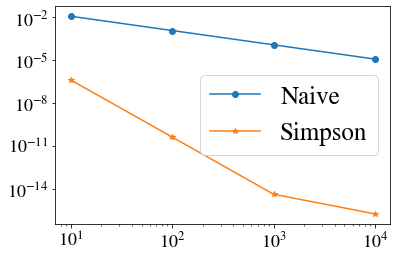

In [20]:
plt.plot(Qs, np.mean(err1s, axis=1), "o-", label="Naive")
plt.plot(Qs, np.mean(err2s, axis=1), "*-", label="Simpson")
plt.yscale("log")
plt.xscale("log")
plt.legend()

In [26]:
Qs = [10, 100, 1000, 10000]

err1s = []
err2s = []
for Q in Qs:
    x1 = np.linspace(0, 1, Q+1)
    x2 = np.linspace(0, 1, Q+2)
    f1s = np.exp(x1) + x1;
    f2s = x1**2;
    f3s = np.sin(x1) + x1;
    fs1 = np.stack([f1s, f2s, f3s]).T;
    
    f1s = np.exp(x2) + x2;
    f2s = x2**2;
    f3s = np.sin(x2) + x2;
    fs2 = np.stack([f1s, f2s, f3s]).T;
    int1s = integration_fn(fs1, ws="sim")
    int2s = integration_fn(fs2, ws="sim");
    err1 = np.abs(int1s.numpy()-gtvs)
    err2 = np.abs(int2s.numpy()-gtvs)

    err1s.append(err1)
    err2s.append(err2)
err1s = np.array(err1s)
err2s = np.array(err2s);

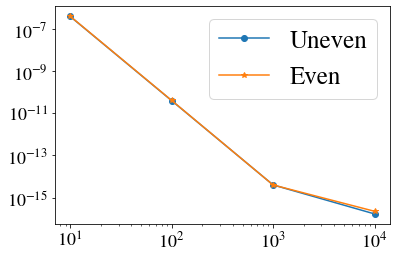

In [27]:
plt.plot(Qs, np.mean(err1s, axis=1), "o-", label="Uneven")
plt.plot(Qs, np.mean(err2s, axis=1), "*-", label="Even")
plt.yscale("log")
plt.xscale("log")
plt.legend()